In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Project 2: Climate

## 🎗️ Reminders

* **Canvas Assignment Details**. View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details such as the assignment rubric and due dates.
* **Auto-Grader.** Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
* **[Optional] Project Partner.** 
    * For this assignment, you are allowed to complete this project with a partner, but you are not required to work with a partner.
    * If you want to work with someone, you and your partner should set up a Canvas group with your instructor for this assignment.
    * Keep in mind that for group assignments, one submission will count for the entire group in Canvas.
    * You and your partner will receive the same grade for this project.
* **Code Sharing.** Don't share your code directly with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for our exams and potentially for future work in this field. If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem or you can focus on a specific part of a task.
* **Support.** You are not alone! Meet with your instructor or the tutors, post questions on Canvas or the student Discord channel, and talk to your classmates during our meetings. If you're ever feeling overwhelmed or don't know how to make progress, talk to your instructor or a tutor.
* **Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).
* **Open Response Tasks:** Make sure that you put the answers to the written questions in the indicated cell we provide and generate the graphs as requested. Usually, the point number for the open response tasks corresponds to the number of things you need to address in your response.
* **Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in the first task, we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.
* You are never expected to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like! 

Run the following cell to get and import the relevant tools.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 🌡️ Part 1: Temperatures

In the following analysis, we will investigate one of the 21st century's most prominent issues: climate change. While the details of climate science are beyond the scope of this course, we can start to learn about climate change just by analyzing public records of different cities' temperature and precipitation over time.

We will analyze a collection of historical daily temperature and precipitation measurements from weather stations in 210 U.S. cities. The dataset was compiled by Yuchuan Lai and David Dzombak [1]; a description of the data from the original authors and the data itself is available [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488). 

[1] Lai, Yuchuan; Dzombak, David (2019): Compiled historical daily temperature and precipitation data for selected 210 U.S. cities. Carnegie Mellon University. Dataset.

### 🌆 Section 1: Cities

Run the following cell to load information about the `cities` and preview the first few rows.

In [3]:
cities = Table.read_table('city_info.csv').drop(0)
cities.show(3)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31


The `cities` table has one row per weather station and the following columns:

1. `"Name"`: The name of the US city
2. `"ID"`: The unique identifier for the US city
3. `"Lat"`: The latitude of the US city (measured in degrees of latitude)
4. `"Lon"`: The longitude of the US city (measured in degrees of longitude)
4. `"Stn.Name"`: The name of the weather station in which the data was collected
5. `"Stn.stDate"`: A string representing the date of the first recording at that particular station
6. `"Stn.edDate"`: A string representing the date of the last recording at that particular station

The data lists the weather stations at which temperature and precipitation data were collected. Note that although some cities have multiple weather stations, only one is collecting data for that city at any given point in time. Thus, we are able to just focus on the cities themselves.

#### Task 1.1.01 📍🔎

<!-- BEGIN QUESTION -->

In the cell below, produce a scatter plot that plots the latitude and longitude of every city in the `cities` table so that the result places northern cities at the top and western cities at the left.

*Note*: It's okay to plot the same point multiple times!

_Points:_ 2

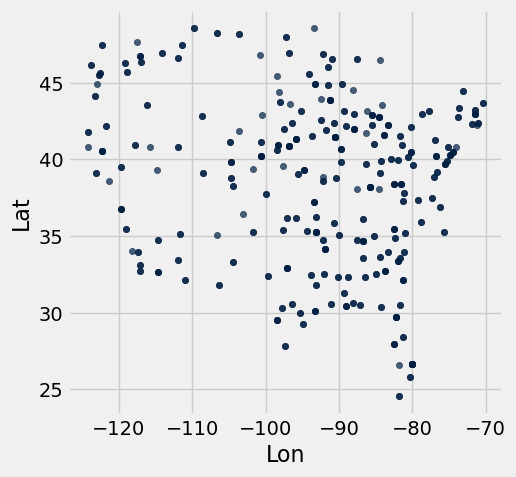

In [4]:
cities.scatter('Lon', 'Lat')

<!-- END QUESTION -->

These cities are all within the continental U.S., and so the general shape of the U.S. should be visible in your plot. The shape will appear distorted compared to most maps for two reasons: the scatter plot is square even though the U.S. is wider than it is tall, and this scatter plot is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection) of the spherical Earth. A geographical map of the same data uses the common [Pseudo-Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection).

In [5]:
# Just run this cell
Marker.map_table(cities.select('Lat', 'Lon', 'Name').relabeled('Name', 'labels'))

#### Task 1.1.02 📍🔎

<!-- BEGIN QUESTION -->

Does it appear that these city locations are sampled uniformly at random from all the locations in the U.S.? Why or why not?

_Points:_ 2

No. It is seems like the eastern are over represented comparing with the western of USA - besides California, Oregon and Washington. 

<!-- END QUESTION -->

#### Task 1.1.03 📍

Assign `num_unique_cities` to the number of unique cities that appear in the `cities` table.

_Note: Keep in mind that it may be possible that there are two cities with the same name._

_Points:_ 6

In [6]:
num_unique_cities = cities.group('ID').num_rows

# Do not change this line
print(f"There are {num_unique_cities} unique cities that appear within our dataset.")

There are 210 unique cities that appear within our dataset.


In [7]:
grader.check("task_1_1_03")

task_1_1_03 results: All test cases passed!
task_1_1_03 - 1 message: ✅ 
task_1_1_03 - 2 message: ✅

In order to investigate further, it will be helpful to determine what region of the United States each city was located in: Northeast, Northwest, Southeast, or Southwest. For our purposes, we will be using the following geographical boundaries:

<img src= "usa_coordinates.png" alt="USA Coordinate Map" width="600"/>

1. A station is located in the `"Northeast"` region if its latitude is above or equal to 40 degrees and its longtitude is greater than or equal to -100 degrees.
2. A station is located in the `"Northwest"` region if its latitude is above or equal to 40 degrees and its longtitude is less than -100 degrees.
3. A station is located in the `"Southeast"` region if its latitude is below 40 degrees and its longtitude is greater than or equal to -100 degrees.
4. A station is located in the `"Southwest"` region if its latitude is below 40 degrees and its longtitude is less than -100 degrees.

#### Task 1.1.04 📍

Define the `coordinates_to_region` function below. It should take in two arguments, a city's latitude (`lat`) and longitude (`lon`) coordinates, and output a string representing the region it is located in.

_Points:_ 4

In [8]:
def coordinates_to_region(lat, lon):
    if lat >= 40 and lon >= -100: 
        return "Northeast"
    elif lat >= 40 and lon < -100: 
        return "Northwest" 
    elif lat < 40 and lon >= -100: 
        return "Southeast"
    else: 
        return "Southwest"

In [9]:
grader.check("task_1_1_04")

task_1_1_04 results: All test cases passed!
task_1_1_04 - 1 message: ✅

#### Task 1.1.05 📍

Add a new column in `cities` labeled `Region` that contains the region in which the city is located. For full credit, you must use the `coordinates_to_region` function you defined rather than re-implementing its logic.

_Points:_ 6

In [10]:
regions_array = cities.apply(coordinates_to_region, 'Lat', 'Lon')
cities = cities.with_column('Region', regions_array)
cities.show(5)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Region
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28,Northwest
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31,Northwest
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31,Northeast


In [11]:
grader.check("task_1_1_05")

task_1_1_05 results: All test cases passed!
task_1_1_05 - 1 message: ✅ 
task_1_1_05 - 2 message: ✅ 
task_1_1_05 - 3 message: ✅

To confirm that you've defined your `coordinates_to_region` function correctly and successfully added the `Region` column to the `cities` table, run the following cell. Each region should have a different color in the result.

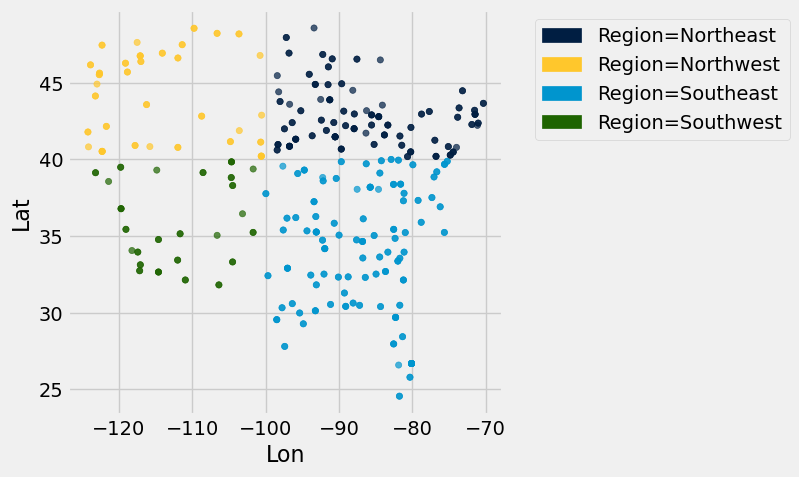

In [12]:
# Just run this cell
cities.scatter("Lon", "Lat", group="Region")

### 🌵 Section 2: Welcome to Phoenix, Arizona

Each city has a different CSV file full of daily temperature and precipitation measurements. The file for Phoenix, Arizona is included with this project as `phoenix.csv`. The files for other cities can be downloaded [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488) by matching them to the ID of the city in the `cities` table.

Since Phoenix is located on the upper edge of the Sonoran Desert, it has some impressive temperatures.

Run the following cell to load in the `phoenix` table. It has one row per day and the following columns:

1. `"Date"`: The date (a string) representing the date of the recording in **YYYY-MM-DD** format
2. `"tmax"`: The maximum temperature for the  day (°F)
3. `"tmin"`: The minimum temperature for the day (°F)
4. `"prcp"`: The recorded precipitation for the day (inches)

In [13]:
phoenix = Table.read_table("phoenix.csv", index_col=0)
phoenix.show(3)

Date,tmax,tmin,prcp
1896-01-01,66,30,0
1896-01-02,64,30,0
1896-01-03,68,30,0


#### Task 1.2.01 📍

Assign the variable `largest_2010_range_date` to the date of the **largest temperature range** in Phoenix, Arizona for any day between January 1st, 2010 and December 31st, 2010. Your answer should be a string in the "YYYY-MM-DD" format. Feel free to use as many lines as you need. A temperature range is calculated as the difference between the max and min temperatures for the day.

*Hint*: To limit the values in a column to only those that *contain* a certain string, pick the right `are.` predicate from the Python Reference Sheet.

*Note:* Do **not** re-assign the `phoenix` variable; please use the `phoenix_with_ranges_2010` variable instead.

_Points:_ 5

In [14]:
#primeiro passo e filtrar o ano 2010
phoenix_with_ranges_2010 = phoenix.where('Date', are.containing('2010'))
#calcular a diferenca da temperatura max e min >> range << 
def range_temp(tmax, tmin):
    return tmax - tmin
#criar uma columa na table com o range
range_dumbledore = phoenix_with_ranges_2010.with_column('Range', phoenix_with_ranges_2010.apply(
    range_temp, 'tmax', 'tmin')).sort('Range', True)
#row e item esta no capitulo 17
largest_2010_range_date = range_dumbledore.row(0).item(0)
largest_2010_range_date

'2010-06-24'

In [15]:
grader.check("task_1_2_01")

task_1_2_01 results: All test cases passed!
task_1_2_01 - 1 message: ✅

We can look back to our `phoenix` table to check the temperature readings for our `largest_2010_range_date` to see if anything special is going on. Run the cell below to find the row of the `phoenix` table that corresponds to the date we found above. 

In [16]:
# Just run this cell
phoenix.where("Date", largest_2010_range_date)

Date,tmax,tmin,prcp
2010-06-24,113,79,0


ZOO WEE MAMA! Look at the maximum temperature for that day. That's hot.

The function `extract_year_from_date` takes a date string in the **YYYY-MM-DD** format and returns an integer representing the **year**. The function `extract_month_from_date` takes a date string and returns a string describing the month. Run this cell, but you do not need to understand how this code works or edit it.

In [17]:
# Just run this cell
import calendar

def extract_year_from_date(date):
    """Returns an integer corresponding to the year of the input string's date."""
    return int(date[:4])

def extract_month_from_date(date):
    "Return an abbreviation of the name of the month for a string's date."
    month = date[5:7]
    return f'{month} ({calendar.month_abbr[int(date[5:7])]})'


# Example
print('2022-04-01 has year', extract_year_from_date('2022-04-01'),
      'and month', extract_month_from_date('2022-04-01'))

2022-04-01 has year 2022 and month 04 (Apr)


#### Task 1.2.02 📍

Add two new columns called `Year` and `Month` to the `phoenix` table that contain the year as an **integer** and the month as a **string** (such as `"04 (Apr)"`) for each day, respectively. 

*Note*: The functions above may be helpful!

_Points:_ 6

In [18]:
years_array = phoenix.apply(extract_year_from_date, 'Date')
months_array = phoenix.apply(extract_month_from_date, 'Date')
phoenix = phoenix.with_columns('Year', years_array, 'Month', months_array)
phoenix.show(5)

Date,tmax,tmin,prcp,Year,Month
1896-01-01,66,30,0,1896,01 (Jan)
1896-01-02,64,30,0,1896,01 (Jan)
1896-01-03,68,30,0,1896,01 (Jan)
1896-01-04,69,34,0,1896,01 (Jan)
1896-01-05,70,46,0,1896,01 (Jan)


In [19]:
grader.check("task_1_2_02")

task_1_2_02 results: All test cases passed!
task_1_2_02 - 1 message: ✅ 
task_1_2_02 - 2 message: ✅ 
task_1_2_02 - 3 message: ✅

#### Task 1.2.03 📍🔎

<!-- BEGIN QUESTION -->

Using the `phoenix` table, create an overlaid line plot of the **average maximum temperature** and **average minimum temperature** for each year between 1900 and 2020 (inclusive). 

*Hint:* To draw a line plot with more than one line, call `plot` on the column label of the x-axis values and all other columns will be treated as y-axis values.

_Points:_ 2

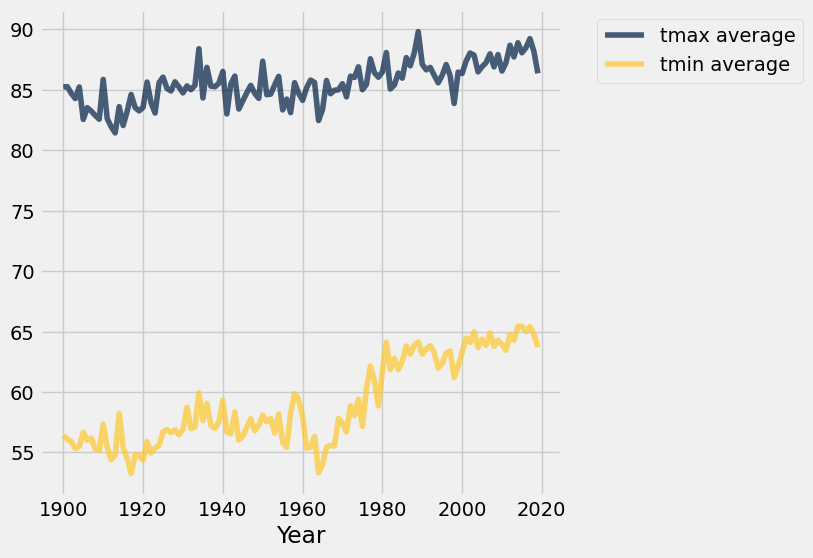

In [20]:
plot_year = phoenix.where('Year', are.between(1900, 2020)).drop('prcp', 'Month', 'Date')
plot_years = plot_year.group('Year', np.average)
plot_years.plot('Year')

<!-- END QUESTION -->

#### Task 1.2.04 📍🔎

<!-- BEGIN QUESTION -->

Although still hotly debated (pun intended), many climate scientists agree that the effects of climate change began to surface in the early 1960s as a result of elevated levels of greenhouse gas emissions. How does the graph you produced in Task 1.2.3 support the claim that modern-day global warming began in the early 1960s? 

_Points:_ 2

Yes. We can see in the graph above that the average minimum temperature increased significantly in the early 1960s, and we can see the average maximum temperature slightly changed as well.

<!-- END QUESTION -->

Averaging temperatures across an entire year can obscure some effects of climate change. For example, if summers get hotter but winters get colder, the annual average may not change much. Let's investigate how average **monthly** maximum temperatures have changed over time in Phoenix. 

#### Task 1.2.05 📍

Create a `monthly_increases` table with one row per month and the following four columns in order: 
1. `"Month"`: The month (such as `"02 (Feb)"`)
2. `"Past"`: The average max temperature in that month from 1900-1960 (inclusive)
3. `"Present"`: The average max temperature in that month from 2019-2021 (inclusive)
4. `"Increase"`: The difference between the present and past average max temperatures in that month

First make a copy of the `phoenix` table and add a new column containing the corresponding **period** for each row. You may find the `period` function helpful. Then, use this new table to construct `monthly_increases`. Feel free to use as many lines as you need.

*Hint*: What table method can we use to get each **unique value** as its own column? 

*Note*: Please do **not** re-assign the `phoenix` variable!

_Points:_ 5

In [21]:
def period(year):
    "Output if a year is in the Past, Present, or Other."
    if 1900 <= year <= 1960:
        return "Past"
    elif 2019 <= year <= 2021:
        return "Present"
    else:
        return "Other"
        
#step 1, colocar na minha mesa phoenix o period column, with.column and apply method. Selecionar apenas o past e present, where statement.
phoenix_period = phoenix.with_column('Period', phoenix.apply(period, 'Year')).where('Period', are.not_equal_to('Other'))                                
#setp 2, filter as columns que estou interessadas - column period, months, tmax. 
phoenix_period_correct = phoenix_period.drop('Date', 'tmin', 'prcp', 'Year')
#step 3, pivot. period and month assinar collect to average
phoenix_period_average = phoenix_period_correct.pivot('Period', 'Month', values='tmax', collect=np.average)
monthly_average = phoenix_period_average.column('Present') - phoenix_period_average.column('Past')
monthly_increases = phoenix_period_average.with_column('Increase', monthly_average)
monthly_increases.show(3)

Month,Past,Present,Increase
01 (Jan),65.0164,67.8312,2.81479
02 (Feb),68.8485,69.1859,0.337362
03 (Mar),74.6499,75.9796,1.32965


In [22]:
grader.check("task_1_2_05")

task_1_2_05 results: All test cases passed!
task_1_2_05 - 1 message: ✅ 
task_1_2_05 - 2 message: ✅ 
task_1_2_05 - 3 message: ✅

#### February in Phoenix

The `"Past"` column values are averaged over many decades, and so they are reliable estimates of the average high temperatures in those months before the effects of modern climate change. However, the `"Present"` column is based on only three years of observations. February, the shortest month, has the fewest total observations: only 85 days. Run the following cell to see this.

In [23]:
# Just run this cell
feb_present = phoenix.where('Year', are.between_or_equal_to(2019, 2021)).where('Month', '02 (Feb)')
feb_present.num_rows

85

Look back to your `monthly_increases` table. Compared to the other months, the increase for the month of February is quite small; the February difference is very close to zero. Run the following cell to print out our observed difference.

In [24]:
# Just run this cell
print(f"February Difference: {monthly_increases.row(1).item('Increase')}")

February Difference: 0.3373623297258632


Perhaps that small difference is somehow due to chance! To investigate this idea requires a thought experiment.

We can observe all of the February maximum temperatures from 2019 to 2021 (the present period), so we have access to the census; there's no random sampling involved. But, we can imagine that if more years pass with the same present-day climate, there would be different but similar maximum temperatures in future February days. From the data we observe, we can try to estimate the **average maximum February temperature** in this imaginary collection of all future February days that would occur in our modern climate, assuming the climate doesn't change any further and many years pass.

We can also imagine that the maximum temperature each day is like a **random draw from a distribution of temperatures for that month**. Treating actual observations of natural events as if they were each *randomly* sampled from some unknown distribution is a simplifying assumption. These temperatures were not actually sampled at random-instead, they occurred due to the complex interactions of the Earth's climate-but treating them as if they were random abstracts away the details of this naturally occurring process and allows us to carry out statistical inference.  Conclusions are only as valid as the assumptions upon which they rest, but in this case, thinking of daily temperatures as random samples from some unknown climate distribution seems at least plausible.

If we assume that the **actual temperatures were drawn at random from some large population of possible February days** in our modern climate, then we can not only estimate the population average of this distribution but also quantify our uncertainty about that estimate using a confidence interval.

#### Task 1.2.06 📍

Complete the implementation of the function `generate_ci`, which takes a one-column table `t` containing sample observations and a confidence `level` percentage such as 95 or 99. It returns an array that represents a confidence interval for the population mean constructed using 5,000 bootstrap resamples.

After defining `generate_ci`, we have provided a line of code that calls `generate_ci` on the present-day February max temperatures to output the array representing a 99% confidence interval for the February average max temperature. The resulting array should be approximately (66 degrees, 72 degrees).

_Points:_ 5

In [25]:
def generate_ci(t, level):
    '''Compute a level% confidence interval (as an array) of the 
    average of the population for which column 0 of Table t contains a sample.'''
    
    # Create an array (stats) of sample averages from 5,000 
    # bootstrap resamples.
    repts = 5000
    stats = make_array()
    for k in np.arange(5000):
        resampled_data = t.sample()
        stat = np.average(resampled_data.column(0))
        stats = np.append(stats, stat)

    # Create an array (ci) where the first element of the array
    # is the lower bound of the interval and the second element is 
    # the upper bound.
    left_side = percentile((100 - level) / 2 , stats)
    right_side = percentile((100 + level) / 2 , stats)
    
    ci = make_array(left_side, right_side)
   
    return ci

# Call generate_ci on the max temperatures in present-day February to find a 99% confidence interval.
feb_present_ci = generate_ci(feb_present.select('tmax'), 99)
feb_present_ci

array([ 66.94823529,  71.30705882])

In [26]:
grader.check("task_1_2_06")

task_1_2_06 results: All test cases passed!
task_1_2_06 - 1 message: ✅ generate_ci produces a 2-element array.
task_1_2_06 - 2 message: ✅ feb_present_ci seems like a possible confidence interval.

#### Task 1.2.07 📍🔎

<!-- BEGIN QUESTION -->

The observed past February average maximum temperature of 68.8485 (from the `monthly_increases` table) is within the `feb_present_ci` 99% confidence interval. 

What conclusion can you draw about the effect of climate change on February's maximum temperatures in Phoenix from this information? Use a 1% p-value cutoff.

*Note*: If you're stuck on this question, re-reading the paragraphs under the *February* heading (particularly the first few) may be helpful.

_Points:_ 2

We fail to reject null hypothesis that the present average max temperature for February is different from the past February max temperature average. An approximate 99% confidence interval for the February average maximum temperature in Phoenix is (67.09529412,  71.24588235) degrees and contains our past February average so the p-value is greater than 0.01.

<!-- END QUESTION -->

#### All Months

#### Task 1.2.08 📍

Repeat the process of comparing the **past average** for each month with a **99% confidence interval**. For each month, print out the name of the month (e.g., `02 (Feb)`), the observed past average, and a confidence interval for the present average.

Use the provided call to `print` in order to format the result as one line per month.

*Hint*: Your code should follow the same format as our code from above (i.e. the *February* section).   

_Points:_ 4

In [27]:
comparisons = make_array()
months = monthly_increases.column('Month')
for month in months:
    past_average = monthly_increases.where('Month', month).column('Past')[0]
    present_observations = phoenix.where('Year', are.between_or_equal_to(2019, 2021)).where('Month', month).select('tmax')
#usar a funcao do ci na task anterior
    present_ci = generate_ci(present_observations, 99)
    present_lower_bound = present_ci.item(0)
    present_upper_bound = present_ci.item(1)
    
    # Do not change the code below this line
    below = past_average < present_lower_bound
    if present_lower_bound <= past_average <= present_upper_bound:
        comparison = 'IN'
    else:
        comparison = 'NOT IN'
    comparisons = np.append(comparisons, comparison)
    
    print('For', month, 'the past avg', round(past_average, 1), 
          'is', comparison, 
          'the 99% CI of the present avg', present_ci, '\n')

For 01 (Jan) the past avg 65.0 is NOT IN the 99% CI of the present avg [ 66.29462366  69.21827957] 

For 02 (Feb) the past avg 68.8 is IN the 99% CI of the present avg [ 67.09647059  71.26705882] 

For 03 (Mar) the past avg 74.6 is IN the 99% CI of the present avg [ 74.03225806  77.95053763] 

For 04 (Apr) the past avg 82.6 is NOT IN the 99% CI of the present avg [ 86.33555556  90.51444444] 

For 05 (May) the past avg 91.4 is NOT IN the 99% CI of the present avg [ 92.49677419  96.57311828] 

For 06 (Jun) the past avg 101.2 is NOT IN the 99% CI of the present avg [ 104.21888889  107.10888889] 

For 07 (Jul) the past avg 103.6 is NOT IN the 99% CI of the present avg [ 105.47311828  108.82043011] 

For 08 (Aug) the past avg 101.4 is NOT IN the 99% CI of the present avg [ 105.67741935  108.8827957 ] 

For 09 (Sep) the past avg 97.7 is NOT IN the 99% CI of the present avg [  99.22888889  103.14888889] 

For 10 (Oct) the past avg 86.8 is NOT IN the 99% CI of the present avg [ 87.80645161  92

In [28]:
grader.check("task_1_2_08")

task_1_2_08 results: All test cases passed!
task_1_2_08 - 1 message: ✅

#### Task 1.2.09 📍🔎

<!-- BEGIN QUESTION -->

Summarize your findings. After comparing the past average to the 99% confidence interval for each month, what conclusions can we make about the monthly average maximum temperature in historical (1900-1960) vs. modern (2019-2021) times in the twelve months? In other words, what null hypothesis should you consider, and for which months would you reject or fail to reject the null hypothesis? Use a 1% p-value cutoff.

*Hint*: Do you notice any seasonal patterns?

_Points:_ 2

It looks like most of the winter months - December, February, and March - did not change significantly (p-value = 1%) compared to the maximum temperature in historical vs. modern. This means if we consider the null hypothesis, the maximum temperature in historical vs. modern is the same; we fail to reject the null hypothesis. In contrast with other months, we have strong evidence to reject the null hypothesis. 

<!-- END QUESTION -->

## 👋 Submit your Progress Check to Canvas

1. In the related Canvas Assignment page, check the requirements for a Complete score for this checkpoint.
1. Run the following code cell that will run all of the auto-graders tests for the above tasks.
2. Remember that Tasks 1.1.01, 1.1.02, 1.2.03, 1.2.04, 1.2.07, and 1.2.09 will need to be manually reviewed.
4. Select the menu items "File", "Save and Export Notebook As...", and "HTML (.html)" in the notebook's Toolbar to download an HTML version of this notebook file.
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded HTML file.

**Keep in mind that the autograder does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

--- 
The cell below will re-run all of the autograder tests for Part 1 to double check your work.

In [29]:
try:
    checkpoint_tests = ["task_1_1_03", "task_1_1_04", "task_1_1_05", "task_1_2_01", 
                        "task_1_2_02", "task_1_2_05", "task_1_2_06", "task_1_2_08"]
    for test in checkpoint_tests:
        display(grader.check(test))
except NameError:
    print('The auto-grader has not be initialized.')

task_1_1_03 results: All test cases passed!
task_1_1_03 - 1 message: ✅ 
task_1_1_03 - 2 message: ✅

task_1_1_04 results: All test cases passed!
task_1_1_04 - 1 message: ✅

task_1_1_05 results: All test cases passed!
task_1_1_05 - 1 message: ✅ 
task_1_1_05 - 2 message: ✅ 
task_1_1_05 - 3 message: ✅

task_1_2_01 results: All test cases passed!
task_1_2_01 - 1 message: ✅

task_1_2_02 results: All test cases passed!
task_1_2_02 - 1 message: ✅ 
task_1_2_02 - 2 message: ✅ 
task_1_2_02 - 3 message: ✅

task_1_2_05 results: All test cases passed!
task_1_2_05 - 1 message: ✅ 
task_1_2_05 - 2 message: ✅ 
task_1_2_05 - 3 message: ✅

task_1_2_06 results: All test cases passed!
task_1_2_06 - 1 message: ✅ generate_ci produces a 2-element array.
task_1_2_06 - 2 message: ✅ feb_present_ci seems like a possible confidence interval.

task_1_2_08 results: All test cases passed!
task_1_2_08 - 1 message: ✅

## 💧 Part 2: Drought

According to the [United States Environmental Protection Agency](https://www.epa.gov/climate-indicators/southwest), "Large portions of the Southwest have experienced drought conditions since weekly Drought Monitor records began in 2000. For extended periods from 2002 to 2005 and from 2012 to 2020, nearly the entire region was abnormally dry or even drier." 

Assessing the impact of drought is challenging with just city-level data because so much of the water that people use is transported from elsewhere, but we'll explore the data we have and see what we can learn.

Let's first take a look at the precipitation data in the Southwest region. The `southwest.csv` file contains total annual precipitation for 13 cities in the southwestern United States for each year from 1960 to 2021. This dataset is aggregated from the daily data and includes only the Southwest cities from the original dataset that have consistent precipitation records back to 1960.

In [30]:
southwest = Table.read_table('southwest.csv')
southwest.show(5)

City,Year,Total Precipitation
Albuquerque,1960,8.12
Albuquerque,1961,8.87
Albuquerque,1962,5.39
Albuquerque,1963,7.47
Albuquerque,1964,7.44


### Task 2.01 📍

Create a table `totals` that has one row for each year in chronological order. It should contain the following columns:
1. `"Year"`: The year (a number)
2. `"Precipitation"`: The total precipitation in all 13 southwestern cities that year

_Points:_ 5

In [31]:
totals = southwest.group(
    'Year', sum).drop('City sum').sort(
    'Year', False).relabeled('Total Precipitation sum', 'Precipitation')
totals

Year,Precipitation
1960,149.58
1961,134.82
1962,130.41
1963,132.18
1964,123.41
1965,187.53
1966,120.27
1967,179.02
1968,136.25
1969,191.72


In [32]:
grader.check("task_2_01")

task_2_01 results: All test cases passed!
task_2_01 - 1 message: ✅ 
task_2_01 - 2 message: ✅

Run the cell below to plot the total precipitation in these cities over time, so that we can try to spot the drought visually. As a reminder, the drought years given by the EPA were  (2002-2005) and (2012-2020).

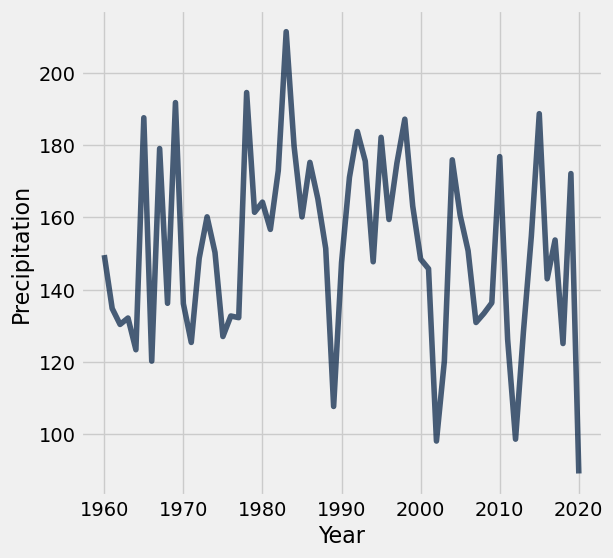

In [33]:
# Just run this cell
totals.plot("Year", "Precipitation")

This plot isn't very revealing. Each year has a different amount of precipitation, and there is quite a bit of variability across years, as if each year's precipitation is a random draw from a distribution of possible outcomes. 

Could it be that these so-called "drought conditions" from 2002-2005 and 2012-2020 can be explained by chance? In other words, could it be that the annual precipitation amounts in the Southwest for these drought years are like **random draws from the same underlying distribution** as for other years? Perhaps nothing about the Earth's precipitation patterns has really changed, and the Southwest U.S. just happened to experience a few dry years close together. 

To assess this idea, let's conduct an A/B test in which **each year's total precipitation** is an outcome, and the condition is **whether or not the year is in the EPA's drought period**.

This `drought_label` function distinguishes between drought years as described in the U.S. EPA statement above (2002-2005 and 2012-2020) and other years. Note that the label "other" is perhaps misleading, since there were other droughts before 2000, such as the massive [1988 drought](https://en.wikipedia.org/wiki/1988%E2%80%9390_North_American_drought) that affected much of the U.S. However, if we're interested in whether these modern drought periods (2002-2005 and 2012-2020) are *normal* or *abnormal*, it makes sense to distinguish the years in this way. 

In [34]:
def drought_label(n):
    """Return the label for an input year n."""
    if 2002 <= n <= 2005 or 2012 <= n <= 2020:
        return 'drought'
    else:
        return 'other'

### Task 2.02 📍🔎

<!-- BEGIN QUESTION -->

Define null and alternative hypotheses for an A/B test that investigates whether drought years are drier (have less precipitation) than other years.

*Note:* Please format your answer using the following structure.

- *Null hypothesis:* ...
- *Alternative hypothesis:* ...

_Points:_ 3

Null hypothesis: The average precipitation is the same over the years. 
Alternative hypothesis: The average precipitation over the years is less during drought years.

<!-- END QUESTION -->

### Task 2.03 📍🔎

<!-- BEGIN QUESTION -->

First, define the table `drought`. It should contain one row per year and the following two columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Precipitation"`: The sum of the total precipitation in 13 Southwest cities that year

Then, construct an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years. 

*Note*: Use the provided `bins` when creating your histogram, and do not re-assign the `southwest` table. Feel free to use as many lines as you need!

*Hint*: The optional `group` argument in a certain function might be helpful!

_Points:_ 3

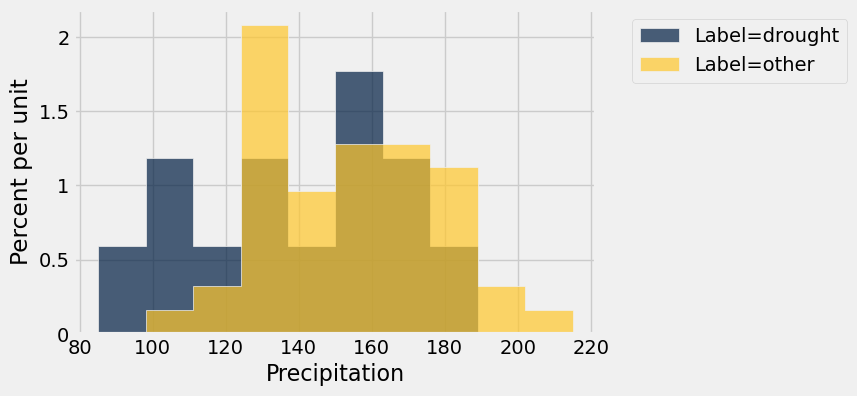

In [35]:
bins = np.arange(85, 215+1, 13)
drought = totals.with_column('Label', totals.apply(drought_label, 'Year')).drop('Year')
drought.hist('Precipitation', group = 'Label', bins = bins)

<!-- END QUESTION -->

Before you continue, inspect the histogram you just created and try to guess the conclusion of the A/B test. Building intuition about the result of hypothesis testing from visualizations is quite useful for data science applications. 

### Task 2.04 📍

Our next step is to choose a test statistic based on a correct alternative hypothesis from Task 2.02. Which of the following options are valid choices for the test statistic? Assign `ab_test_stat` to an array of integers corresponding to valid choices. Assume averages and totals are taken over the total precipitation sums for each year.

1. The **total** precipitation in **drought** years minus the **total** precipitation in **other** years.
2. The **total** precipitation in **others** years minus the **total** precipitation in **drought** years.
3. The **absolute** difference between the **total** precipitation in others years and the **total** precipitation in drought years.
1. The difference between the **average** precipitation in **drought** years and the **average** precipitation in **other** years.
2. The difference between the **average** precipitation in **others** years and the **average** precipitation in **drought** years.
3. The **absolute** difference between the **average** precipitation in others years and the **average** precipitation in drought years.


_Points:_ 5

In [36]:
ab_test_stat = make_array(4, 5)

In [37]:
grader.check("task_2_04")

task_2_04 results: All test cases passed!
task_2_04 - 1 message: ✅ 
task_2_04 - 2 message: ✅ 
task_2_04 - 3 message: ✅

### Task 2.05 📍🔎

<!-- BEGIN QUESTION -->

Fellow climate scientists Olivia and Will point out that there are more **other** years than **drought** years, and so measuring the difference between total precipitation will always favor the **other** years. They conclude that all of the options above involving **total** precipitation are invalid test statistic choices. Do you agree with them? Why or why not?

_Points:_ 2

I agree with them, because the difference between total precipitation needs be scaled base on the number of observation for each type of year. 

<!-- END QUESTION -->

Before going on, check your `drought` table. It should have two columns `Label` and `Precipitation` with 61 rows, 13 of which are for `"drought"` years.

In [38]:
drought.show(3)

Precipitation,Label
149.58,other
134.82,other
130.41,other


In [39]:
drought.group('Label')

Label,count
drought,13
other,48


### Task 2.06📍

For our A/B test, we'll use the difference between the average precipitation in drought years and the average precipitation in other years as our test statistic:

$$\text{average precipitation in "drought" years} - \text{average precipitation in "other" years}$$

First, complete the function `test_statistic`. It should take in a two-column table `t` with one row per year and two columns:
- `Label`: the label for that year (either `'drought'` or `'other'`)
- `Precipitation`: the total precipitation in the 13 Southwest cities that year. 

Then, use the function you define to assign `observed_statistic` to the observed test statistic.

_Points:_ 4

In [40]:
def test_statistic(t):
    means_drought = t.group('Label', np.average).sort('Label').column('Precipitation average')
    return means_drought[0] - means_drought[1]

observed_statistic = test_statistic(drought)
observed_statistic

-15.856714743589748

In [41]:
grader.check("task_2_06")

task_2_06 results: All test cases passed!
task_2_06 - 1 message: ✅

Now that we have defined our hypotheses and test statistic, we are ready to conduct our hypothesis test. We’ll start by defining a function to simulate the test statistic under the null hypothesis, and then call that function 5,000 times to construct an empirical distribution under the null hypothesis.

### Task 2.07 📍

Write a function to simulate the test statistic under the null hypothesis. The `simulate_precipitation_null` function should simulate the null hypothesis once (not 5,000 times) and return the value of the test statistic for that simulated sample.

*Hint*: Using `t.with_column(...)` with a column name that already exists in a table `t` will replace that column with the newly specified values.

_Points:_ 4

In [42]:
def simulate_precipitation_null():
    shuffled_labels = drought.sample(with_replacement=False).column('Label')
    shuffled_table = drought.select('Precipitation').with_column(
        'Label', shuffled_labels) 
    return test_statistic(shuffled_table)

# Run your function a couple times to make sure that it works
simulate_precipitation_null()

4.3857051282051316

In [43]:
grader.check("task_2_07")

task_2_07 results: All test cases passed!
task_2_07 - 1 message: ✅

### Task 2.08 📍

Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 5,000 values of the test statistic under the null hypothesis and store the result in the array `sampled_stats`.

*Hint:* You should use the `simulate_precipitation_null` function you wrote in the previous question!

*Note:* Running this cell may take a few seconds. If it takes more than a minute, try to find a faster way to implement your `simulate_precipitation_null` function.

_Points:_ 6

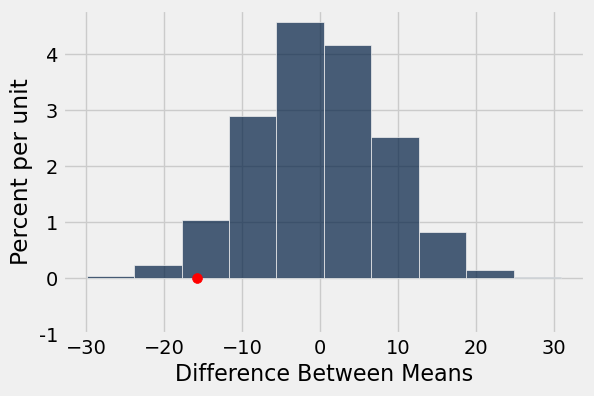

In [44]:
sampled_stats = make_array()

repetitions = 5_000
for i in np.arange(repetitions):
    new_difference = simulate_precipitation_null()
    sampled_stats = np.append(sampled_stats, new_difference)

# Do not change these lines
Table().with_column('Difference Between Means', sampled_stats).hist()
plt.scatter(observed_statistic, 0, c="r", s=50);
plt.ylim(-0.01);

In [45]:
grader.check("task_2_08")

task_2_08 results: All test cases passed!
task_2_08 - 1 message: ✅ 
task_2_08 - 2 message: ✅

### Task 2.09 📍

Compute the p-value for this hypothesis test, and assign it to the variable `precipitation_p_val`.

_Points:_ 5

In [46]:
precipitation_p_val = np.count_nonzero(sampled_stats <= observed_statistic) / 5000
precipitation_p_val

0.0284

In [47]:
grader.check("task_2_09")

task_2_09 results: All test cases passed!
task_2_09 - 1 message: ✅ 
task_2_09 - 2 message: ✅

### Task 2.10 📍🔎

<!-- BEGIN QUESTION -->

State a conclusion from this test using a p-value cutoff of 5%. What have you learned about the EPA's statement on drought?

_Points:_ 2

We have strong evidence to reject that the average precipitation of the years is the same; in favor, the average precipitation of the years is less during drought years. 

<!-- END QUESTION -->

### Task 2.11 📍🔎

<!-- BEGIN QUESTION -->

Does your conclusion from Task 2.10 apply to the entire Southwest region of the U.S.? Why or why not?

_Points:_ 2

No. The Southwest sample worked through the tasks may misleading the representation the entire Southwest region of the U.S. Because the sample is clustering in the major cities and not a random sample of the population of the Southwest region. 

<!-- END QUESTION -->

## 🌍 Conclusion

Data science plays a central role in climate change research because massive simulations of the Earth's climate are necessary to assess the implications of climate data recorded from weather stations, satellites, and other sensors. [Berkeley Earth](http://berkeleyearth.org/data/) is a common source of data for these kinds of projects.

In this project, we found ways to apply our statistical inference technqiues that rely on random sampling even in situations where the data were not generated randomly, but instead by some complicated natural process that appeared random. We made assumptions about randomness and then came to conclusions based on those assumptions. Great care must be taken to choose assumptions that are realistic, so that the resulting conclusions are not misleading. However, making assumptions about data can be productive when doing so allows inference techniques to apply to novel situations.

## 🏁 Submit your Project to Canvas

Once you have finished working on the projects tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.
    * _Keep in mind that if you are working in a group, then you only submit one file for your group._

**Keep in mind that the auto-grader does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [50]:
grader.check_all()

task_1_1_03 results: All test cases passed!
task_1_1_03 - 1 message: ✅ 
task_1_1_03 - 2 message: ✅ 

task_1_1_04 results: All test cases passed!
task_1_1_04 - 1 message: ✅ 

task_1_1_05 results: All test cases passed!
task_1_1_05 - 1 message: ✅ 
task_1_1_05 - 2 message: ✅ 
task_1_1_05 - 3 message: ✅ 

task_1_2_01 results: All test cases passed!
task_1_2_01 - 1 message: ✅ 

task_1_2_02 results: All test cases passed!
task_1_2_02 - 1 message: ✅ 
task_1_2_02 - 2 message: ✅ 
task_1_2_02 - 3 message: ✅ 

task_1_2_05 results: All test cases passed!
task_1_2_05 - 1 message: ✅ 
task_1_2_05 - 2 message: ✅ 
task_1_2_05 - 3 message: ✅ 

task_1_2_06 results: All test cases passed!
task_1_2_06 - 1 message: ✅ generate_ci produces a 2-element array.
task_1_2_06 - 2 message: ✅ feb_present_ci seems like a possible confidence interval.

task_1_2_08 results: All test cases passed!
task_1_2_08 - 1 message: ✅ 

task_2_01 results: All test cases passed!
task_2_01 - 1 message: ✅ 
task_2_01 - 2 message: ✅ 

t